# 1.Importing libraries


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score
from ydata_profiling import ProfileReport


#### Reading the dataset


In [86]:
df = pd.read_csv('/home/ahmed/Desktop/Technocolabs_Internship/Week1/Employee-Attrition-Analysis-and-Turnover-Predictions-main/Attrition Dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [87]:
df.shape

(1470, 35)

# 2.Data exploration


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [89]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Missing values handling

In [90]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [91]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [92]:
df.dropna(axis=0,inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


No Missing values

#### Duplicated Rows

In [93]:
df.duplicated().sum()

0

No Duplicated rows

#### Handling outliers

Age
[60, 18]


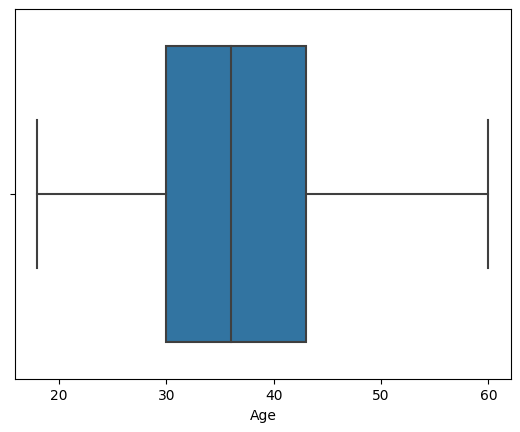

Attrition
[0.0, 1]


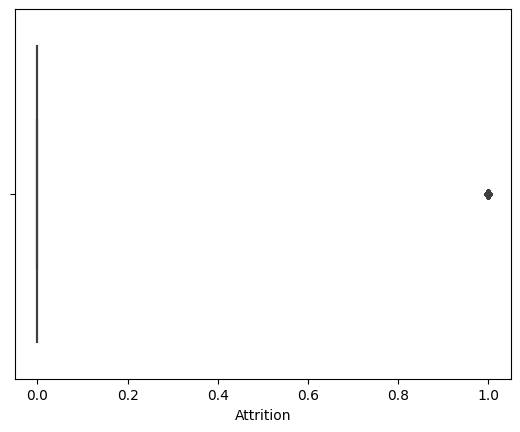

BusinessTravel
[2, 0]


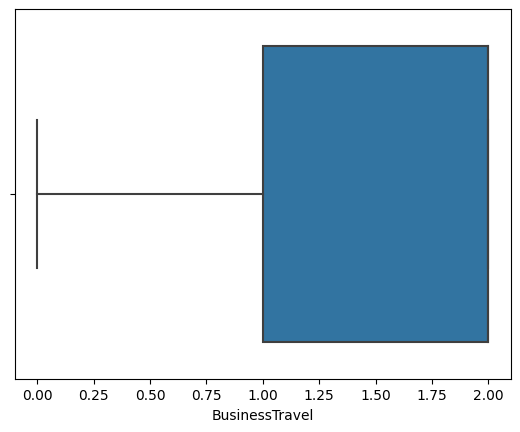

DailyRate
[1499, 102]


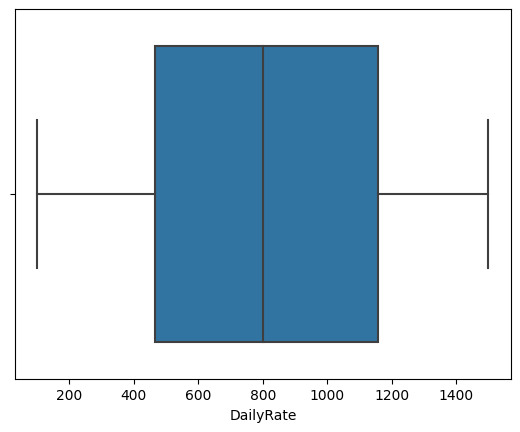

DistanceFromHome
[29, 1]


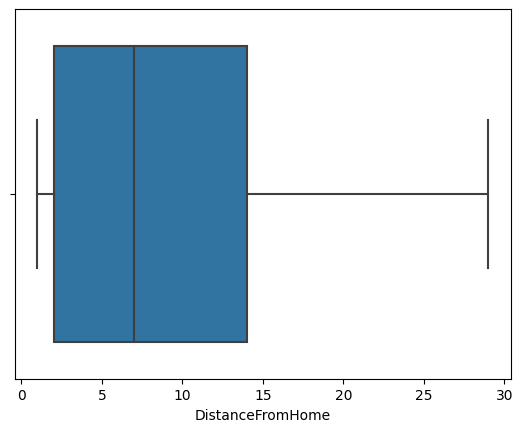

Education
[5, 1]


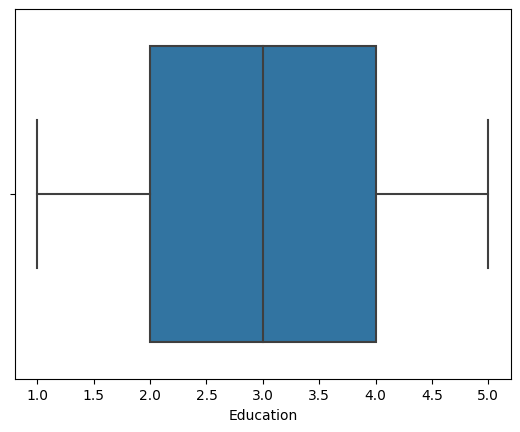

EmployeeCount
[1.0, 1.0]


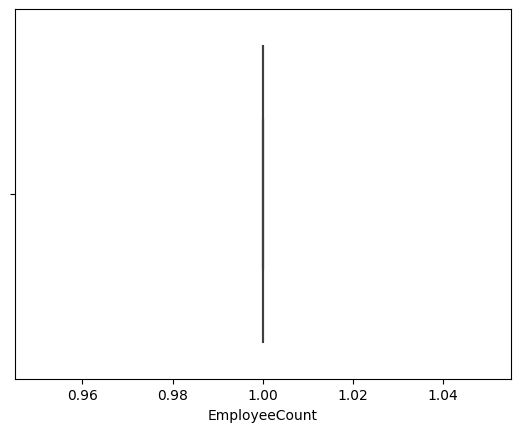

EmployeeNumber
[2068, 1]


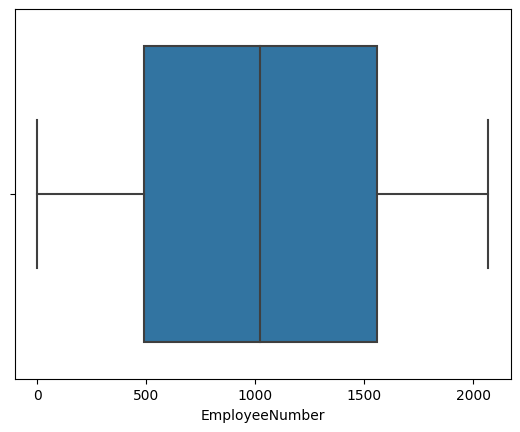

EnvironmentSatisfaction
[4, 1]


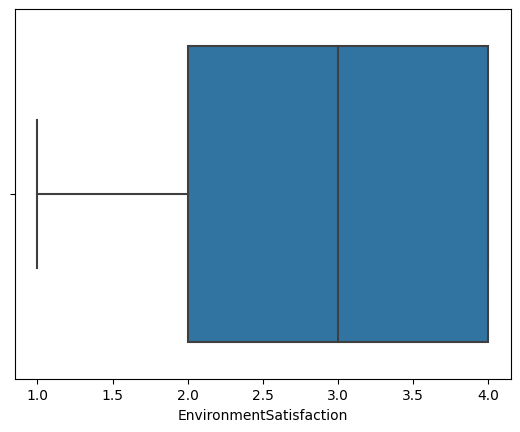

Gender
[1, 0]


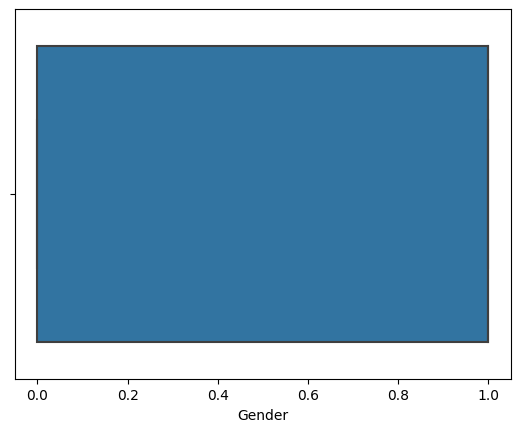

HourlyRate
[100, 30]


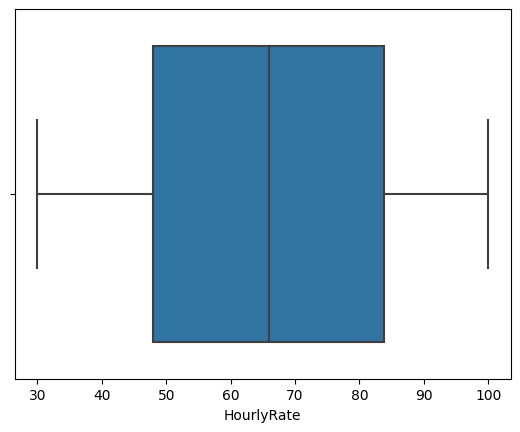

JobInvolvement
[4, 1]


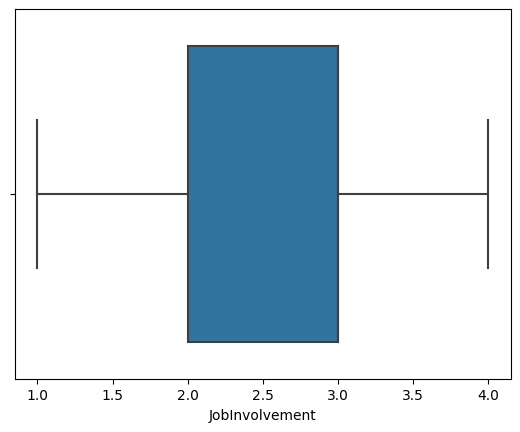

JobLevel
[5, 1]


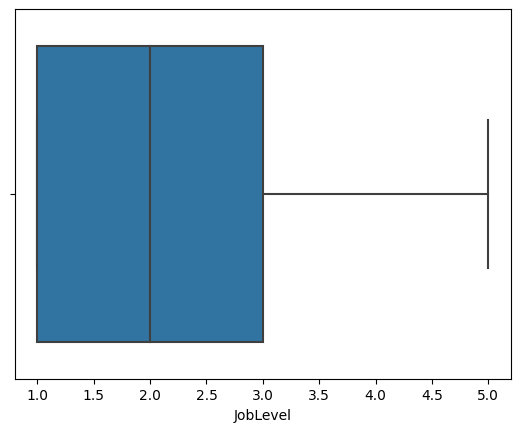

JobSatisfaction
[4, 1]


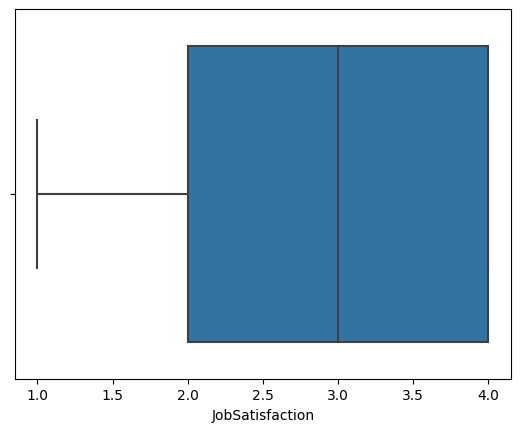

MonthlyIncome
[16555, 1009]


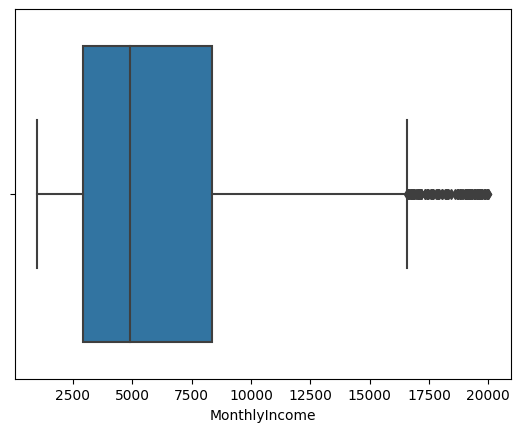

MonthlyRate
[26999, 2094]


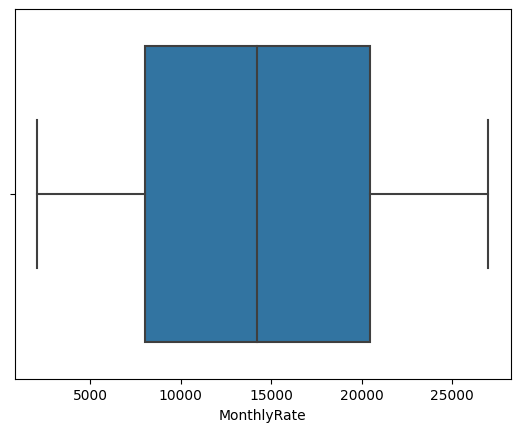

NumCompaniesWorked
[8, 0]


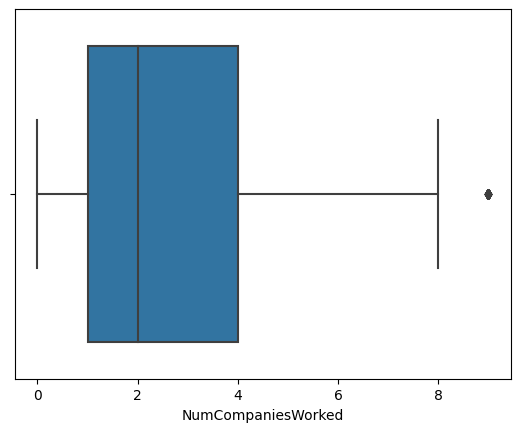

Over18
[0.0, 0.0]


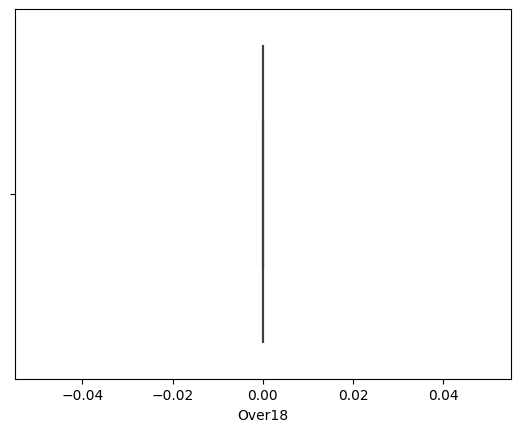

OverTime
[1, 0]


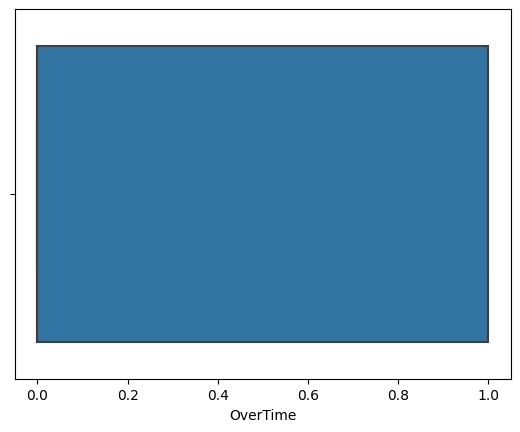

PercentSalaryHike
[25, 11]


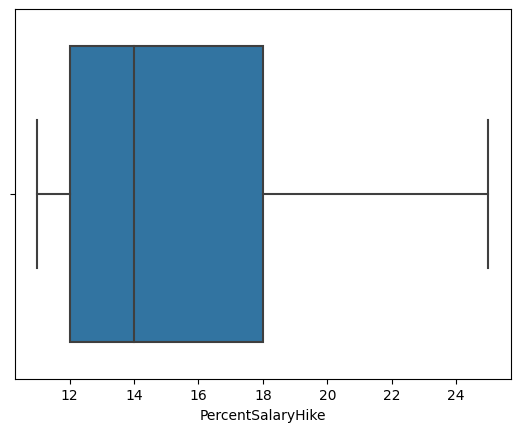

PerformanceRating
[3.0, 4]


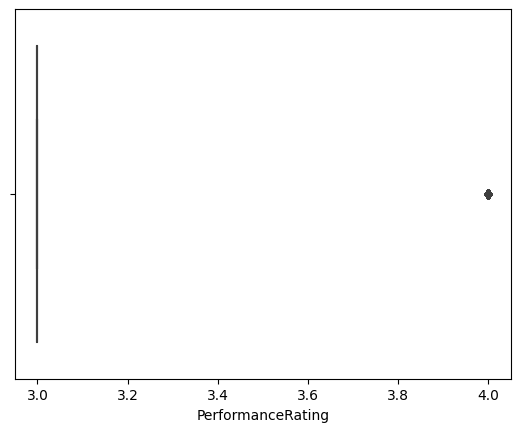

RelationshipSatisfaction
[4, 1]


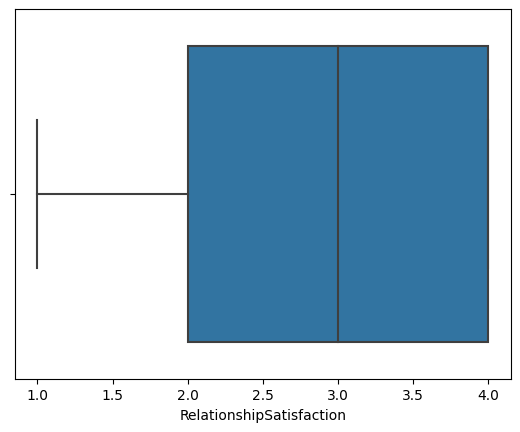

StandardHours
[80.0, 80.0]


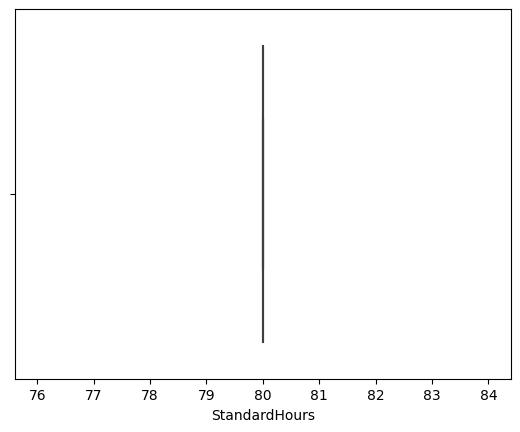

StockOptionLevel
[2, 0]


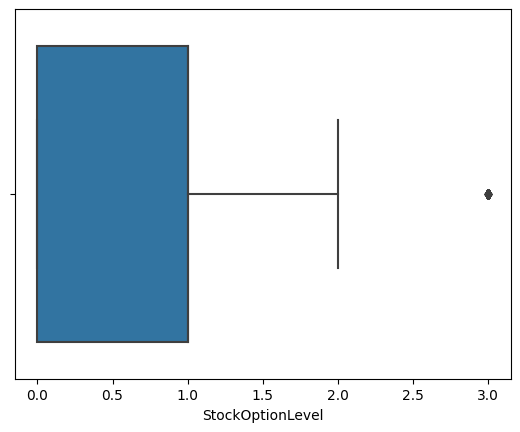

TotalWorkingYears
[28, 0]


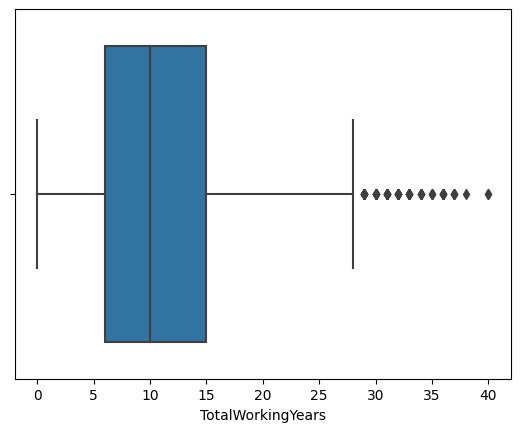

TrainingTimesLastYear
[4, 1]


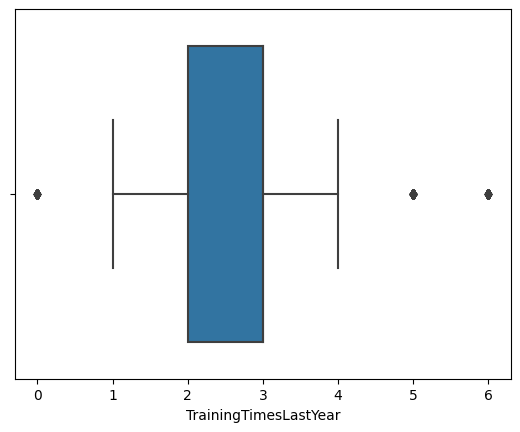

WorkLifeBalance
[4, 1]


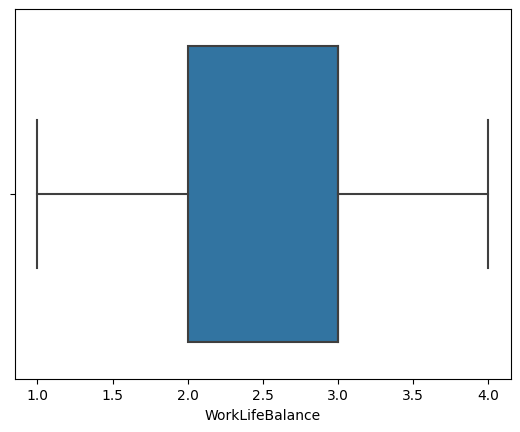

YearsAtCompany
[17, 0]


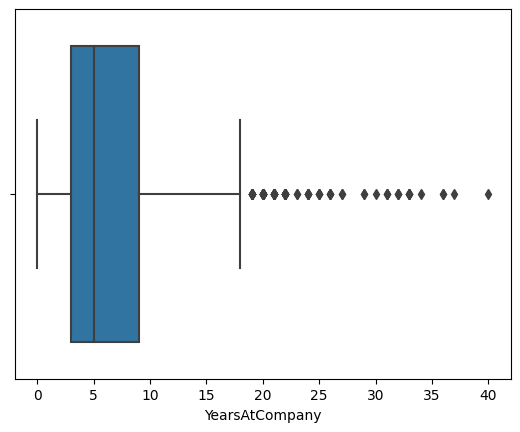

YearsInCurrentRole
[14, 0]


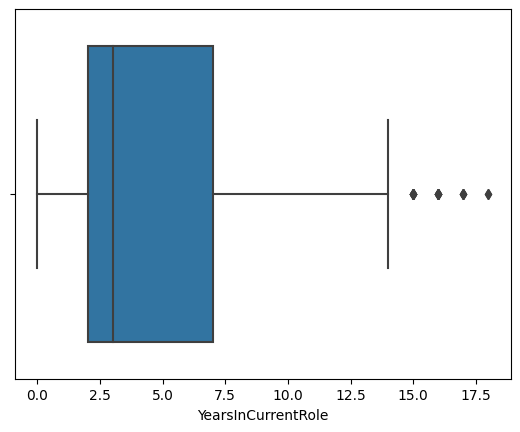

YearsSinceLastPromotion
[7, 0]


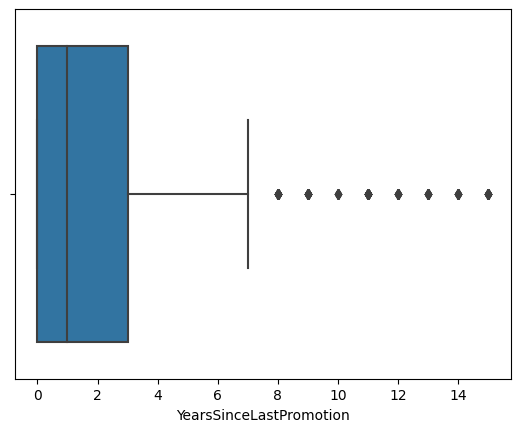

YearsWithCurrManager
[14, 0]


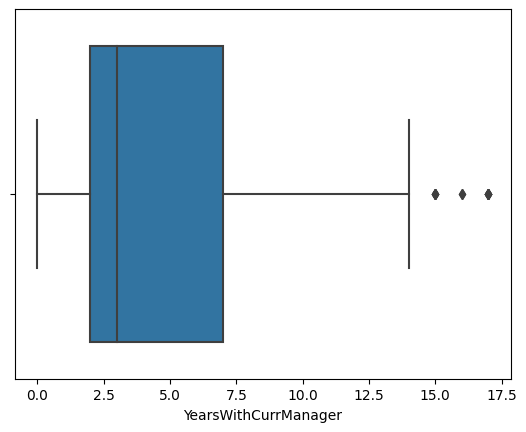

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the IQR fence function
def iqr_fence(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - (1.5 * IQR)
    Upper_Fence = Q3 + (1.5 * IQR)
    
    x_below_upper = x[x < Upper_Fence]
    x_above_lower = x[x > Lower_Fence]
    
    if not x_below_upper.empty:
        u = max(x_below_upper)
    else:
        u = Upper_Fence
        
    if not x_above_lower.empty:
        l = min(x_above_lower)
    else:
        l = Lower_Fence
        
    return [u, l]

# Get the list of numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Loop through each numeric column and plot the boxplot
for i in numeric_columns:
    print(i)
    print(iqr_fence(df[i]))
    sns.boxplot(x=df[i])
    plt.show()

### A globale Repport about our Data

In [94]:
profile = ProfileReport(df,title='Employee-Attrition-Analysis-and-Turnover-Predictions')

In [18]:
# profile.to_file('Employee-Attrition-Analysis-and-Turnover-Predictions.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Categorical variables

In [95]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [96]:
# Create the table
table = {
    'Variables': [],
    'Unique': [],
    'Count_unique' : [],
    # 'value_count' : []
}

for column in categorical_columns:
    unique_values = df[column].unique()
    count_unique = unique_values.shape
    # value_count = df[column].value_counts()
    
    table['Variables'].append(column)
    table['Unique'].append(unique_values)
    table['Count_unique'].append(count_unique)
    # table['value_count'].append(value_count)

# Convert the table to a DataFrame for better display
table_df = pd.DataFrame(table)
table_df

,Variables,Unique,Count_unique
0,Attrition,"[Yes, No]","(2,)"
1,BusinessTravel,"[Travel_Rarely, Travel_Frequently, Non-Travel]","(3,)"
2,Department,"[Sales, Research & Development, Human Resources]","(3,)"
3,EducationField,"[Life Sciences, Other, Medical, Marketing, Tec...","(6,)"
4,Gender,"[Female, Male]","(2,)"
5,JobRole,"[Sales Executive, Research Scientist, Laborato...","(9,)"
6,MaritalStatus,"[Single, Married, Divorced]","(3,)"
7,Over18,[Y],"(1,)"
8,OverTime,"[Yes, No]","(2,)"


# Data Visualization

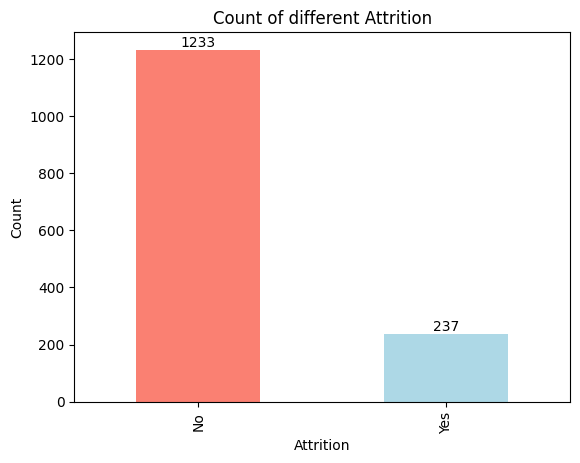

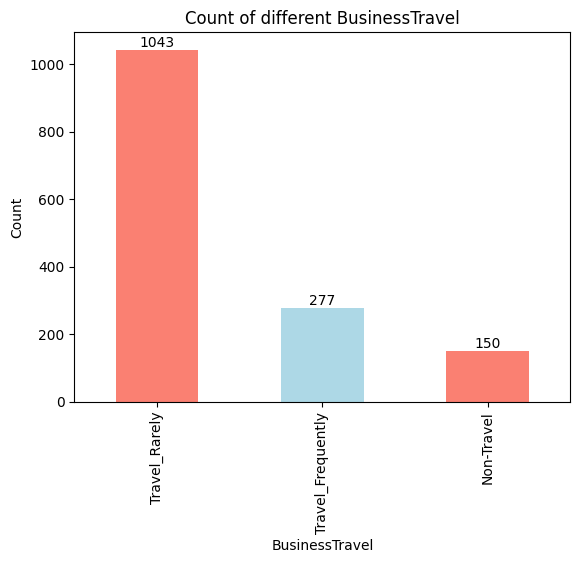

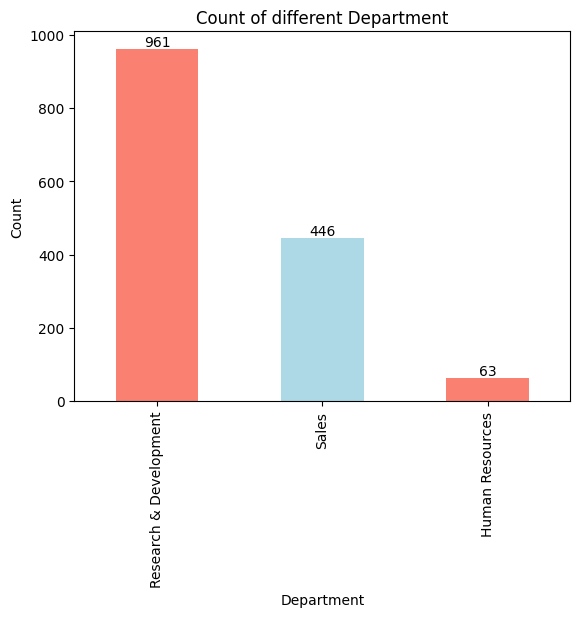

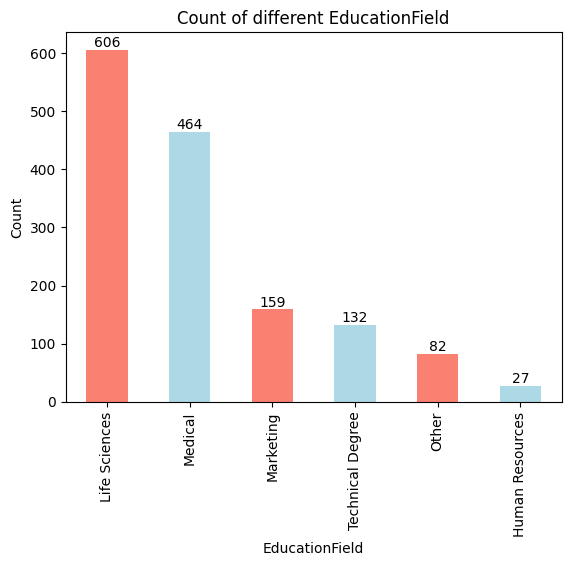

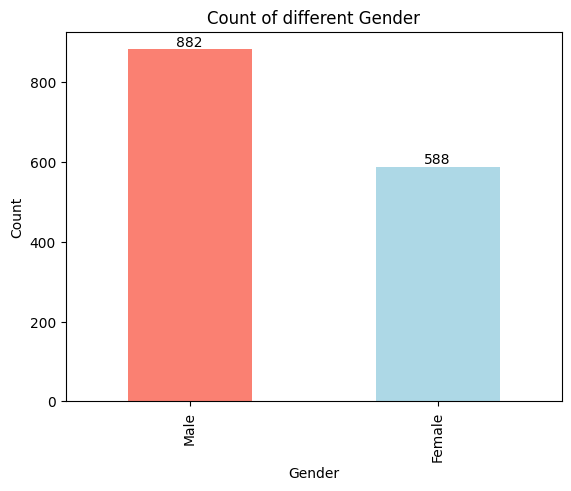

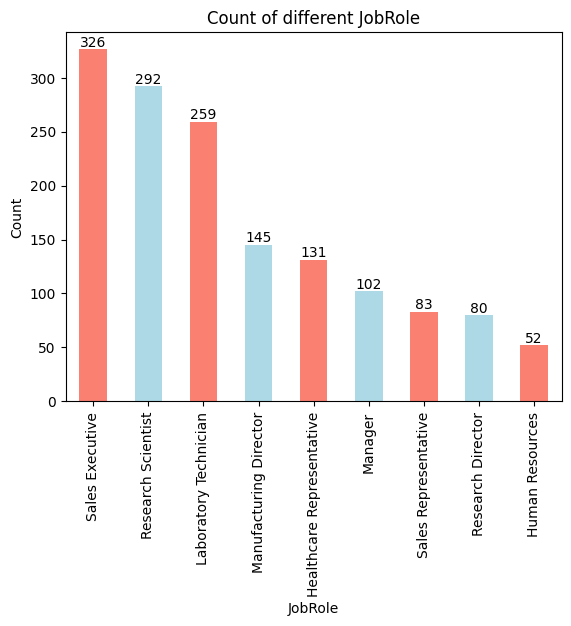

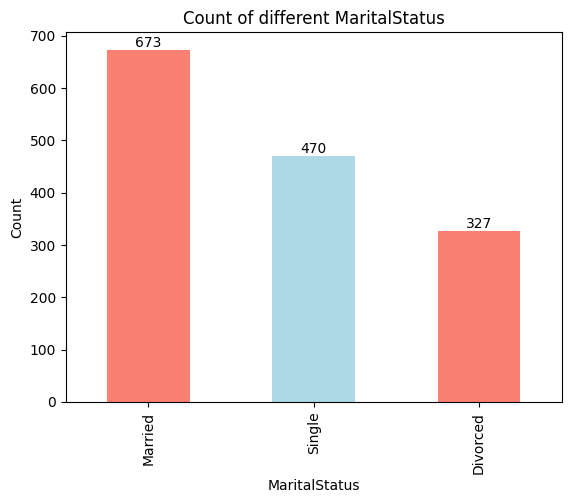

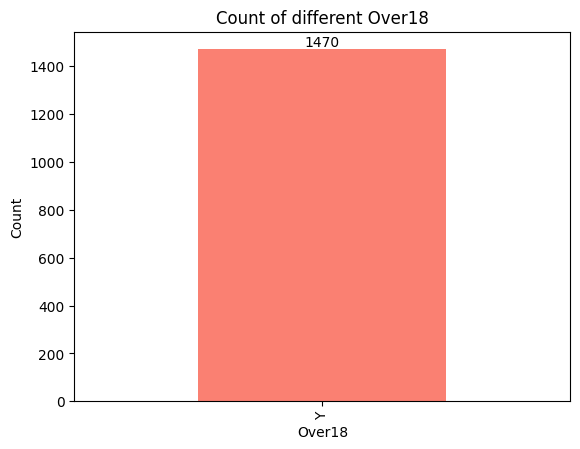

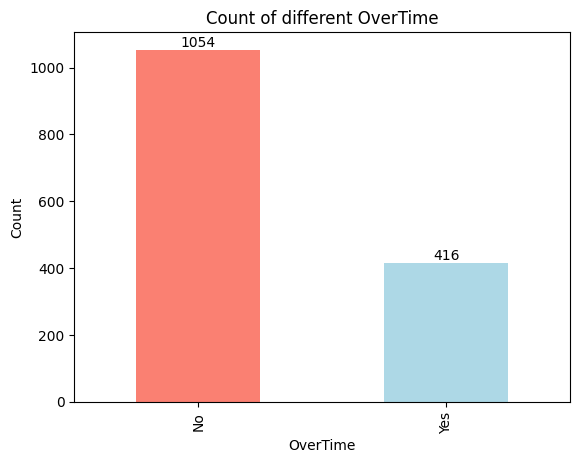

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Enable inline plotting in Jupyter
%matplotlib inline

# Create plots
for column in categorical_columns:
    value_counts = df[column].value_counts()
    ax = value_counts.plot(kind='bar', color=['salmon', 'lightblue'])
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Count of different {column}')
    
    # Add labels on the bars
    for i in ax.containers:
        ax.bar_label(i)
    
    plt.show()


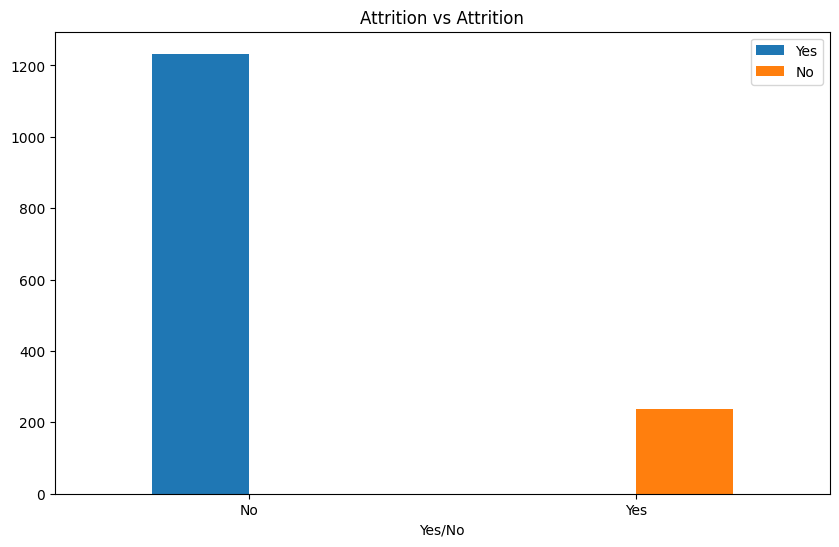

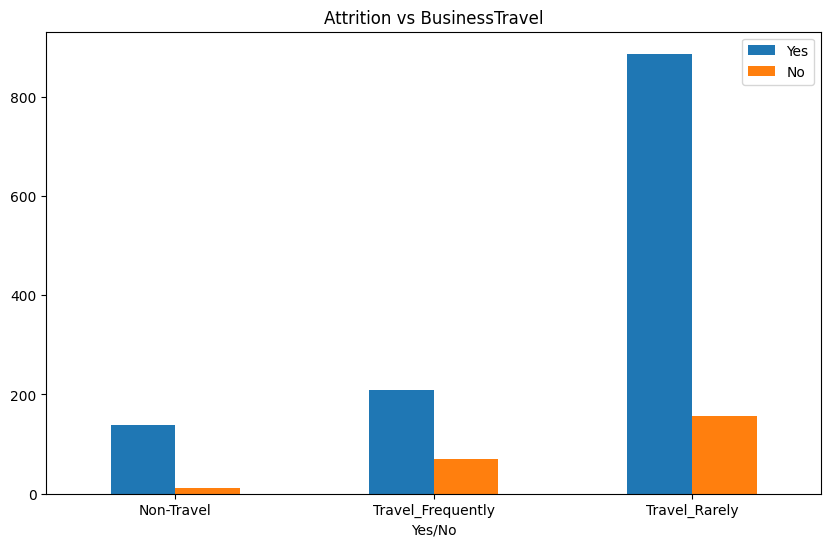

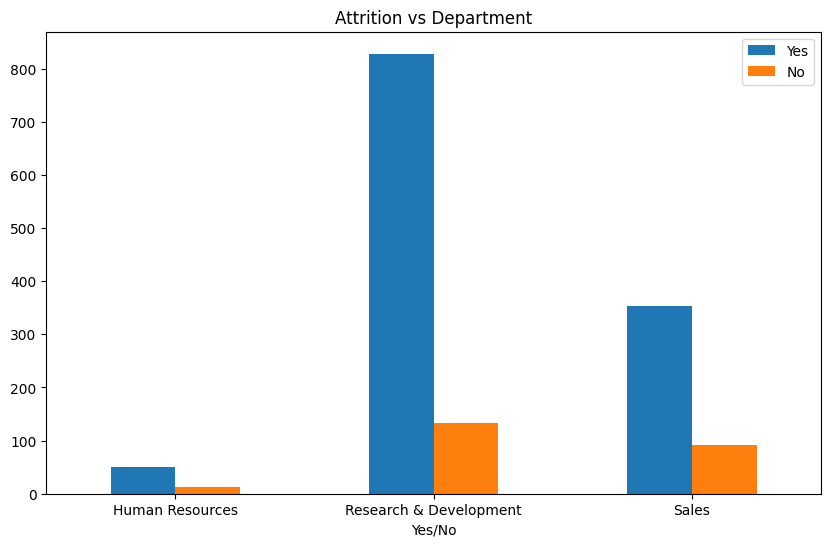

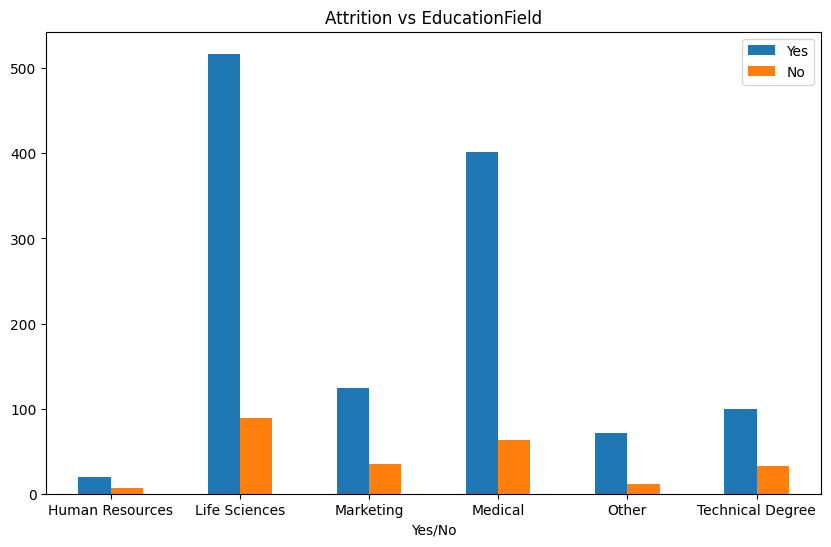

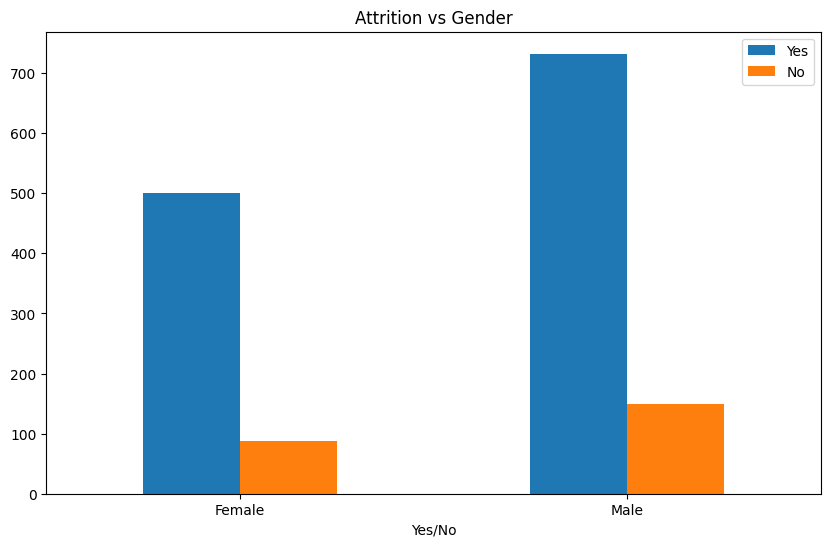

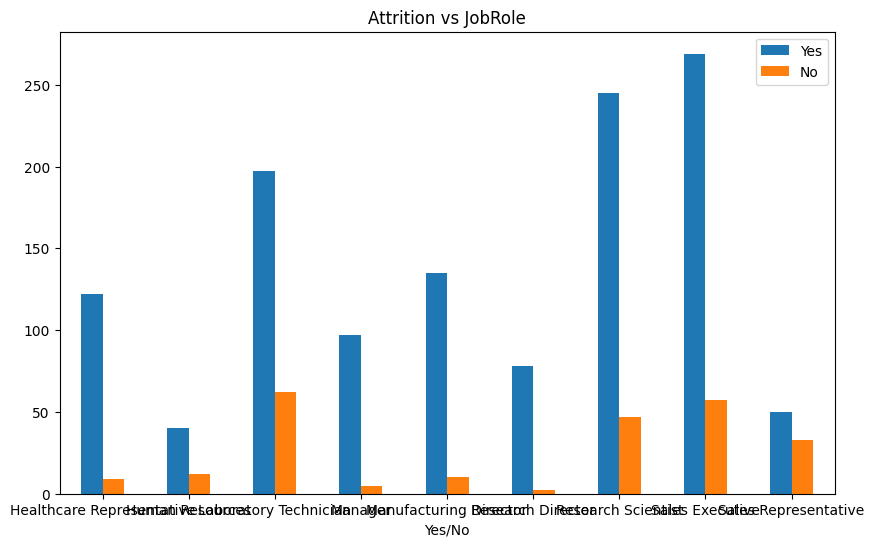

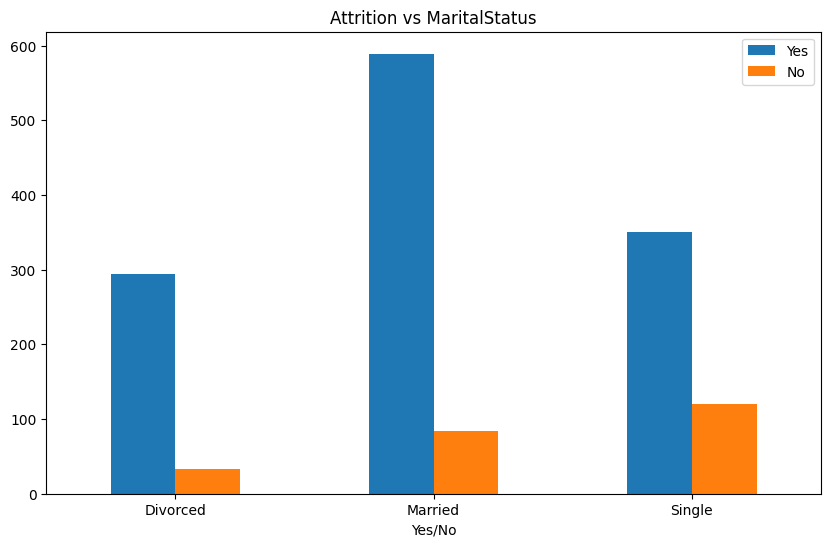

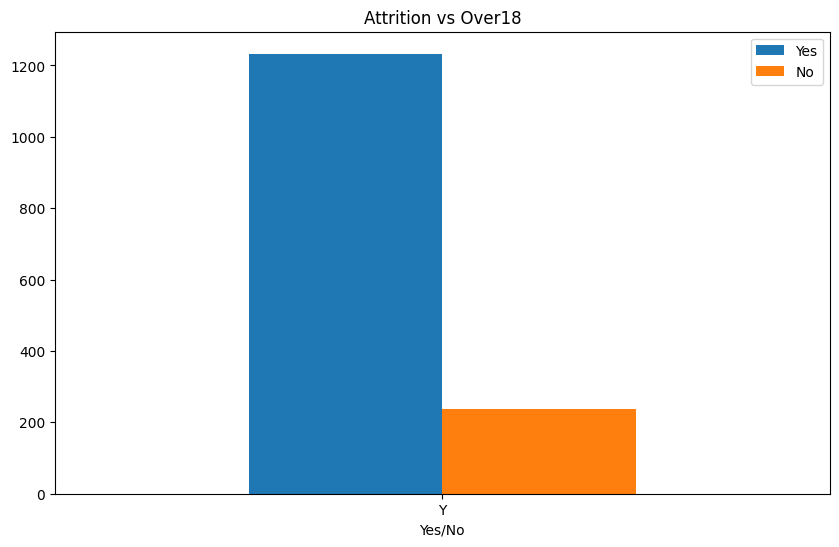

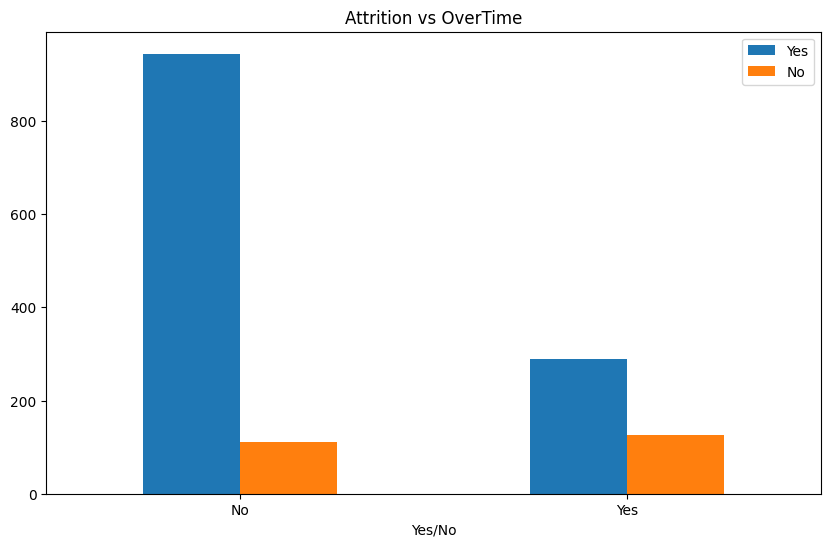

In [98]:
for column in categorical_columns: 
    pd.crosstab(df[column],df['Attrition']).plot(kind="bar",figsize=(10,6))
    plt.title(f"Attrition vs {column}")
    plt.xlabel("Yes/No")
    plt.legend(["Yes","No"])
    plt.xticks(rotation=0)

##### Correlation Matrix (in the Repport "Employee-Attrition-Analysis-and-Turnover-Predictions.html")

# Data cleaning

In [99]:
categorical_columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [100]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [101]:
encoded_labels = LabelEncoder()
encoded_labels

LabelEncoder()

In [102]:
#creating instance of one-hot-encoder
One_Hot_encoder = OneHotEncoder(handle_unknown='ignore')
One_Hot_encoder

OneHotEncoder(handle_unknown='ignore')

In [103]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [104]:
table_df

,Variables,Unique,Count_unique
0,Attrition,"[Yes, No]","(2,)"
1,BusinessTravel,"[Travel_Rarely, Travel_Frequently, Non-Travel]","(3,)"
2,Department,"[Sales, Research & Development, Human Resources]","(3,)"
3,EducationField,"[Life Sciences, Other, Medical, Marketing, Tec...","(6,)"
4,Gender,"[Female, Male]","(2,)"
5,JobRole,"[Sales Executive, Research Scientist, Laborato...","(9,)"
6,MaritalStatus,"[Single, Married, Divorced]","(3,)"
7,Over18,[Y],"(1,)"
8,OverTime,"[Yes, No]","(2,)"


In [105]:
df['Attrition'] = encoded_labels.fit_transform(df['Attrition'])
df['Over18'] = encoded_labels.fit_transform(df['Over18'])
df['OverTime'] = encoded_labels.fit_transform(df['OverTime'])
df['Gender'] = encoded_labels.fit_transform(df['Gender'])
df['BusinessTravel'] = encoded_labels.fit_transform(df['BusinessTravel'])

In [124]:
One_Hot_encoded_data = One_Hot_encoder.fit_transform(df[['Department', 'EducationField', 'JobRole', 'MaritalStatus']])


In [125]:
One_Hot_encoded_df = pd.DataFrame(One_Hot_encoded_data.toarray(), columns=One_Hot_encoder.get_feature_names_out(['Department', 'EducationField', 'JobRole', 'MaritalStatus']))


In [126]:
One_Hot_encoded_df

,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [127]:
df2 = pd.concat([df, One_Hot_encoded_df], axis=1)
df2

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,1102,Sales,1,2,Life Sciences,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,0,1,279,Research & Development,8,1,Life Sciences,1,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1,2,1373,Research & Development,2,2,Other,1,4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,0,1,1392,Research & Development,3,4,Life Sciences,1,5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,27,0,2,591,Research & Development,2,1,Medical,1,7,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,Research & Development,23,2,Medical,1,2061,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,39,0,2,613,Research & Development,6,1,Medical,1,2062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,27,0,2,155,Research & Development,4,3,Life Sciences,1,2064,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,49,0,1,1023,Sales,2,3,Medical,1,2065,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
df2.drop(['Department', 'EducationField', 'JobRole', 'MaritalStatus'], axis=1, inplace=True)

In [131]:
df2

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,1102,1,2,1,1,2,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,0,1,279,8,1,1,2,3,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1,2,1373,2,2,1,4,4,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,0,1,1392,3,4,1,5,4,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,27,0,2,591,2,1,1,7,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,23,2,1,2061,3,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,39,0,2,613,6,1,1,2062,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,27,0,2,155,4,3,1,2064,2,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,49,0,1,1023,2,3,1,2065,4,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [132]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   int64  
 2   BusinessTravel                     1470 non-null   int64  
 3   DailyRate                          1470 non-null   int64  
 4   DistanceFromHome                   1470 non-null   int64  
 5   Education                          1470 non-null   int64  
 6   EmployeeCount                      1470 non-null   int64  
 7   EmployeeNumber                     1470 non-null   int64  
 8   EnvironmentSatisfaction            1470 non-null   int64  
 9   Gender                             1470 non-null   int64  
 10  HourlyRate                         1470 non-null   int64  
 11  JobInvolvement                     1470 non-null   int64

#### Drop columns have no sense such as "EmployeeCount" and "Over18"

In [133]:
df2.drop(['EmployeeCount','Over18'],axis=1,inplace=True)

In [134]:
df2

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,1102,1,2,1,2,0,94,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,0,1,279,8,1,2,3,1,61,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1,2,1373,2,2,4,4,1,92,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,0,1,1392,3,4,5,4,0,56,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,27,0,2,591,2,1,7,1,1,40,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,23,2,2061,3,1,41,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,39,0,2,613,6,1,2062,4,1,42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,27,0,2,155,4,3,2064,2,1,87,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,49,0,1,1023,2,3,2065,4,1,63,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Age
[60, 18]


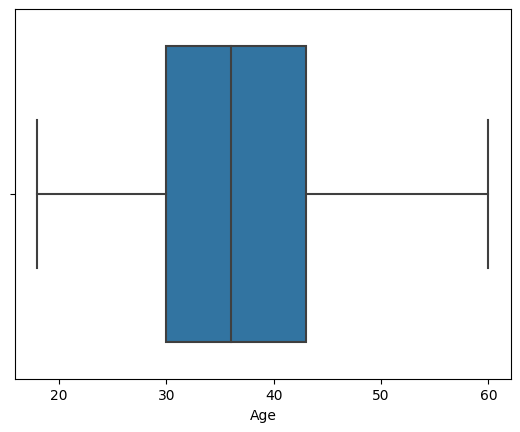

Attrition
[0.0, 1]


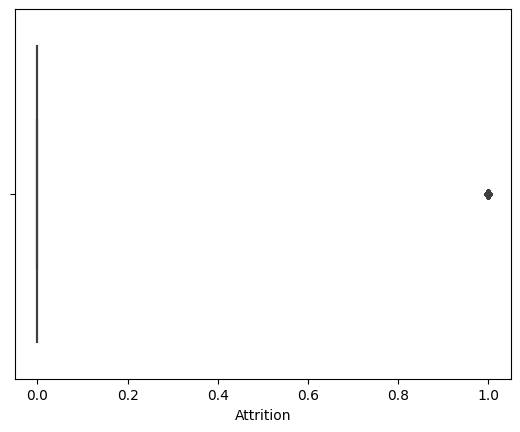

BusinessTravel
[2, 0]


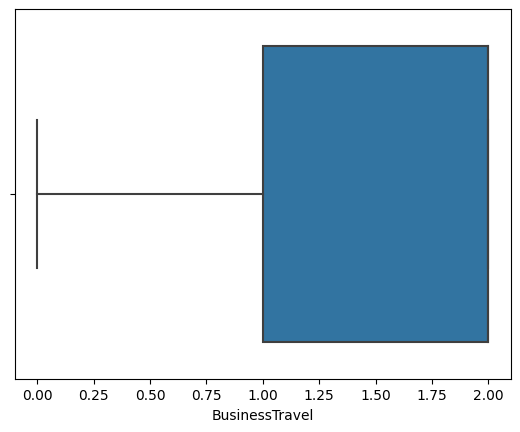

DailyRate
[1499, 102]


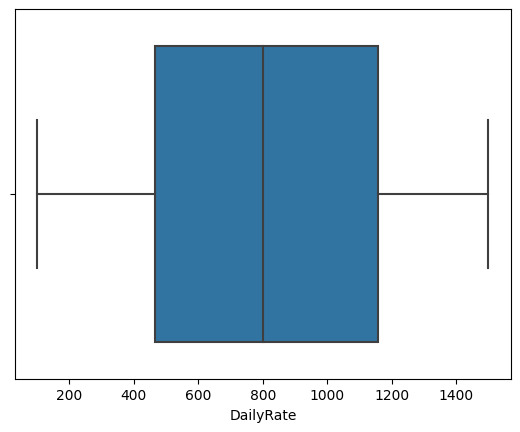

DistanceFromHome
[29, 1]


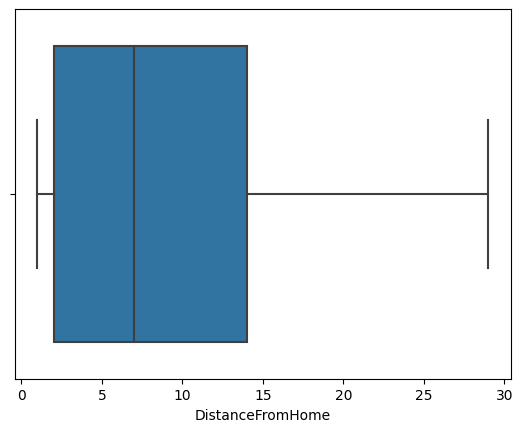

Education
[5, 1]


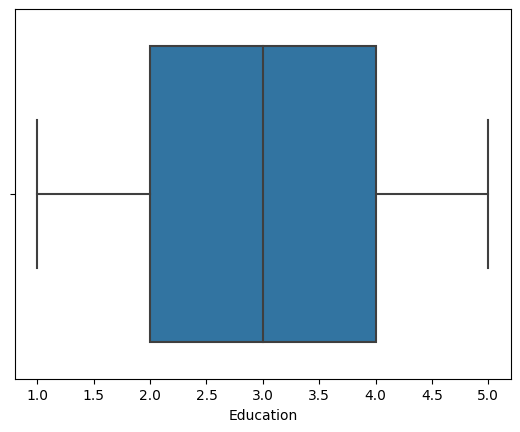

EmployeeCount
[1.0, 1.0]


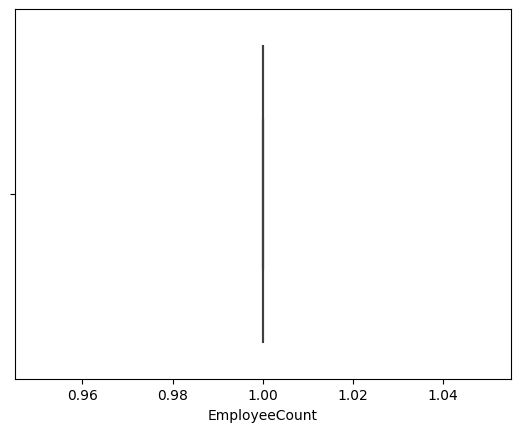

EmployeeNumber
[2068, 1]


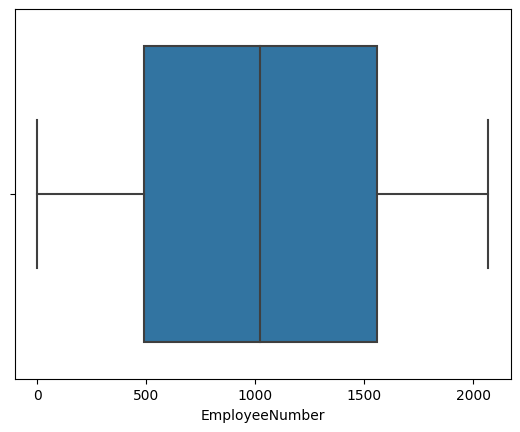

EnvironmentSatisfaction
[4, 1]


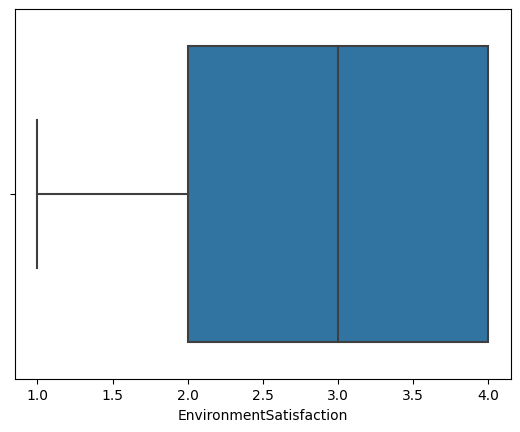

Gender
[1, 0]


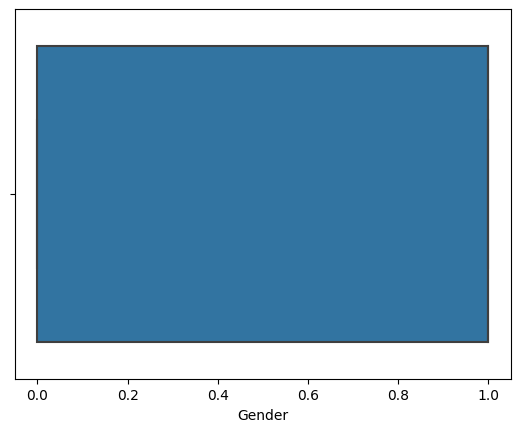

HourlyRate
[100, 30]


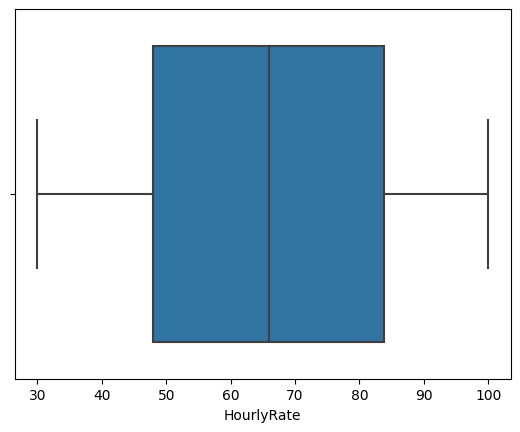

JobInvolvement
[4, 1]


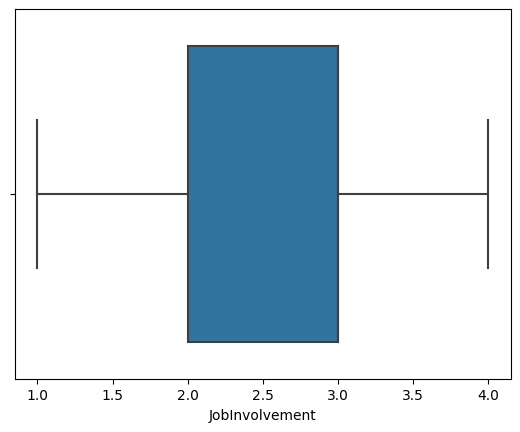

JobLevel
[5, 1]


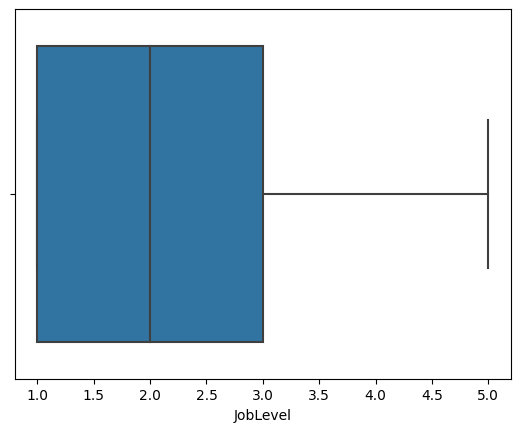

JobSatisfaction
[4, 1]


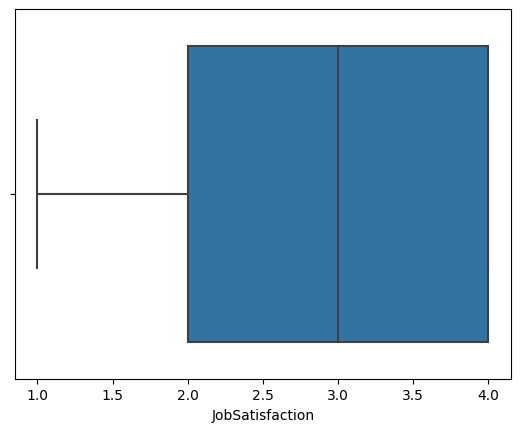

MonthlyIncome
[16555, 1009]


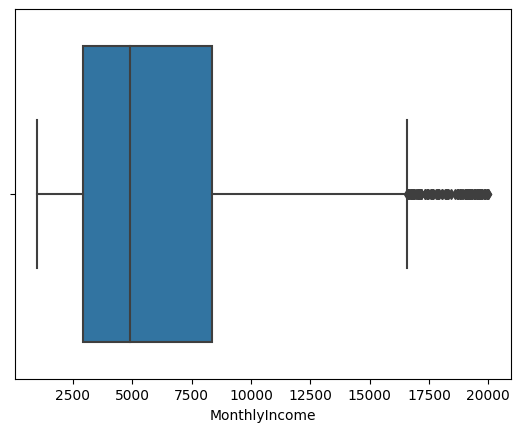

MonthlyRate
[26999, 2094]


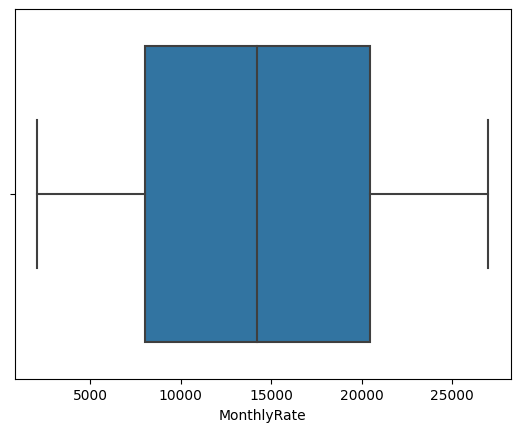

NumCompaniesWorked
[8, 0]


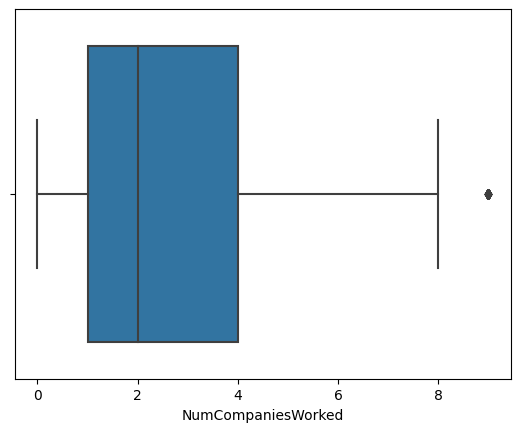

Over18
[0.0, 0.0]


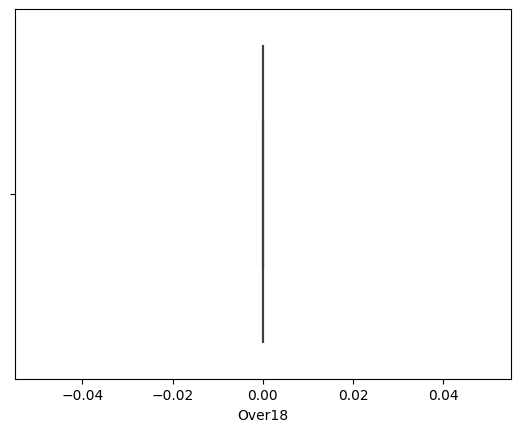

OverTime
[1, 0]


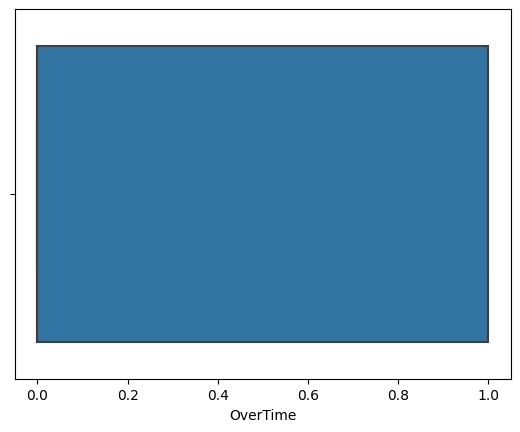

PercentSalaryHike
[25, 11]


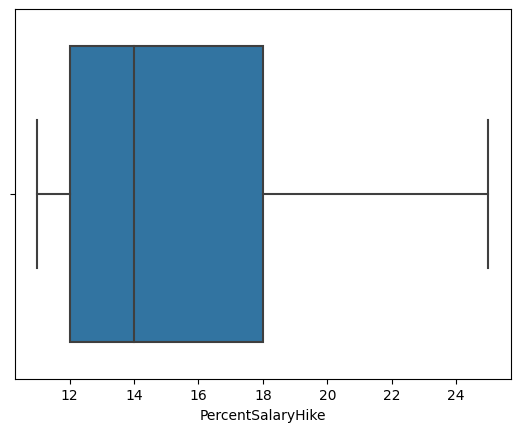

PerformanceRating
[3.0, 4]


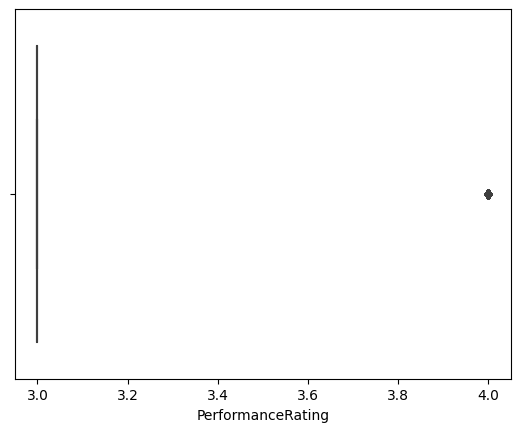

RelationshipSatisfaction
[4, 1]


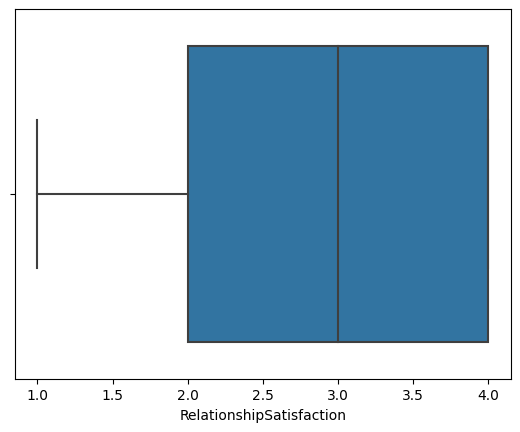

StandardHours
[80.0, 80.0]


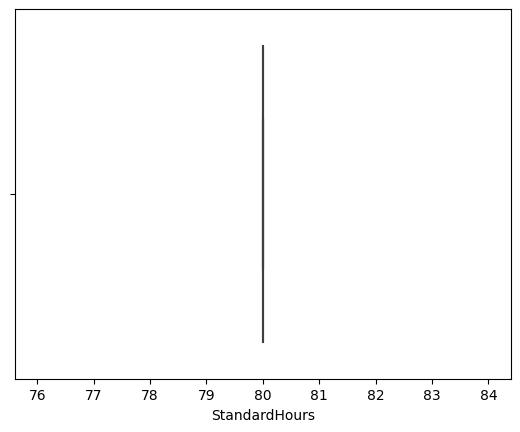

StockOptionLevel
[2, 0]


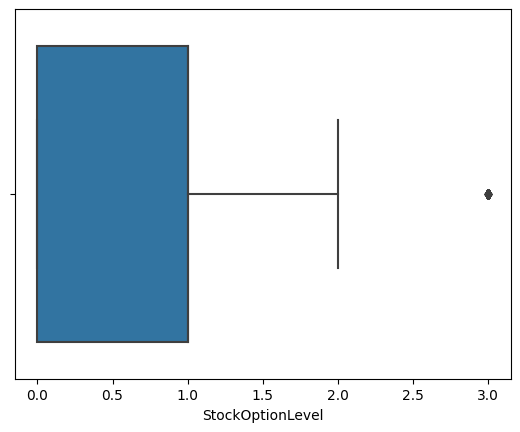

TotalWorkingYears
[28, 0]


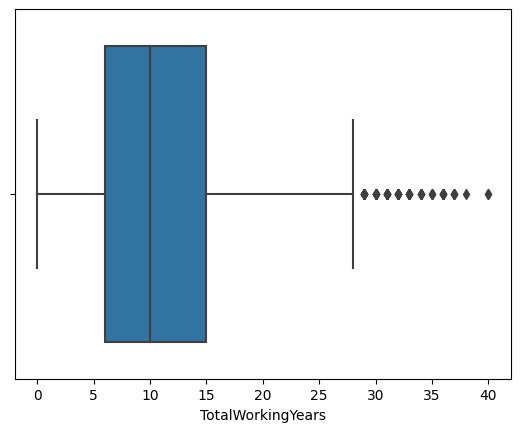

TrainingTimesLastYear
[4, 1]


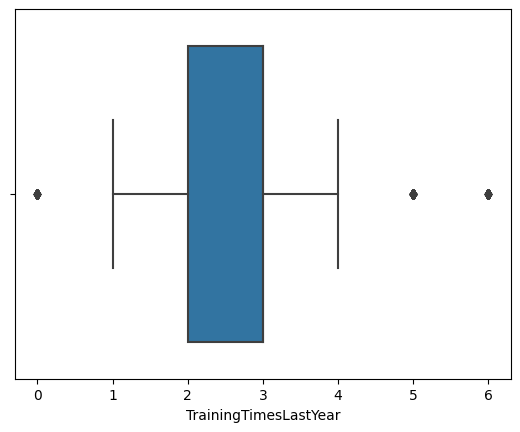

WorkLifeBalance
[4, 1]


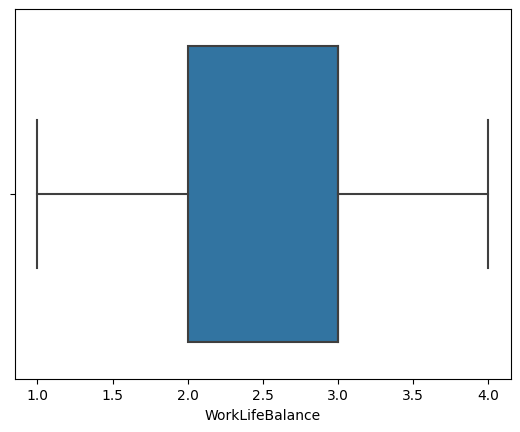

YearsAtCompany
[17, 0]


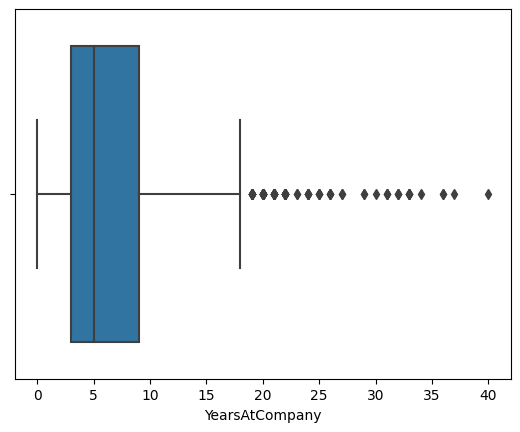

YearsInCurrentRole
[14, 0]


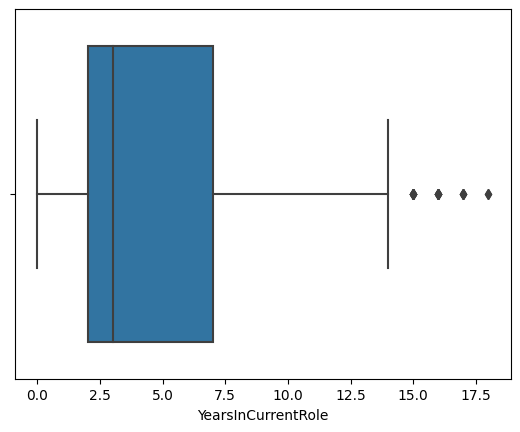

YearsSinceLastPromotion
[7, 0]


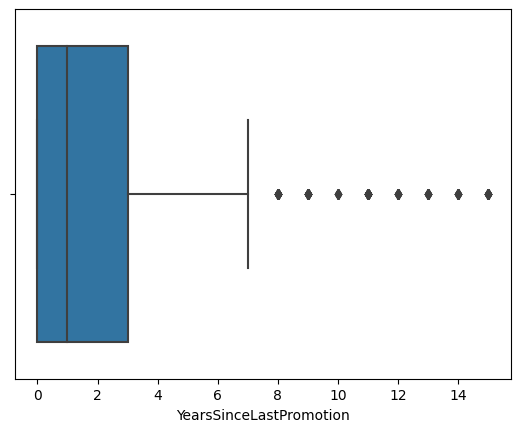

YearsWithCurrManager
[14, 0]


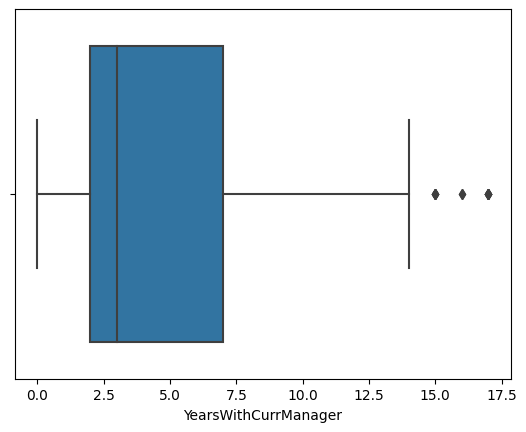

#### correlation Matrix

In [135]:
import seaborn as sns

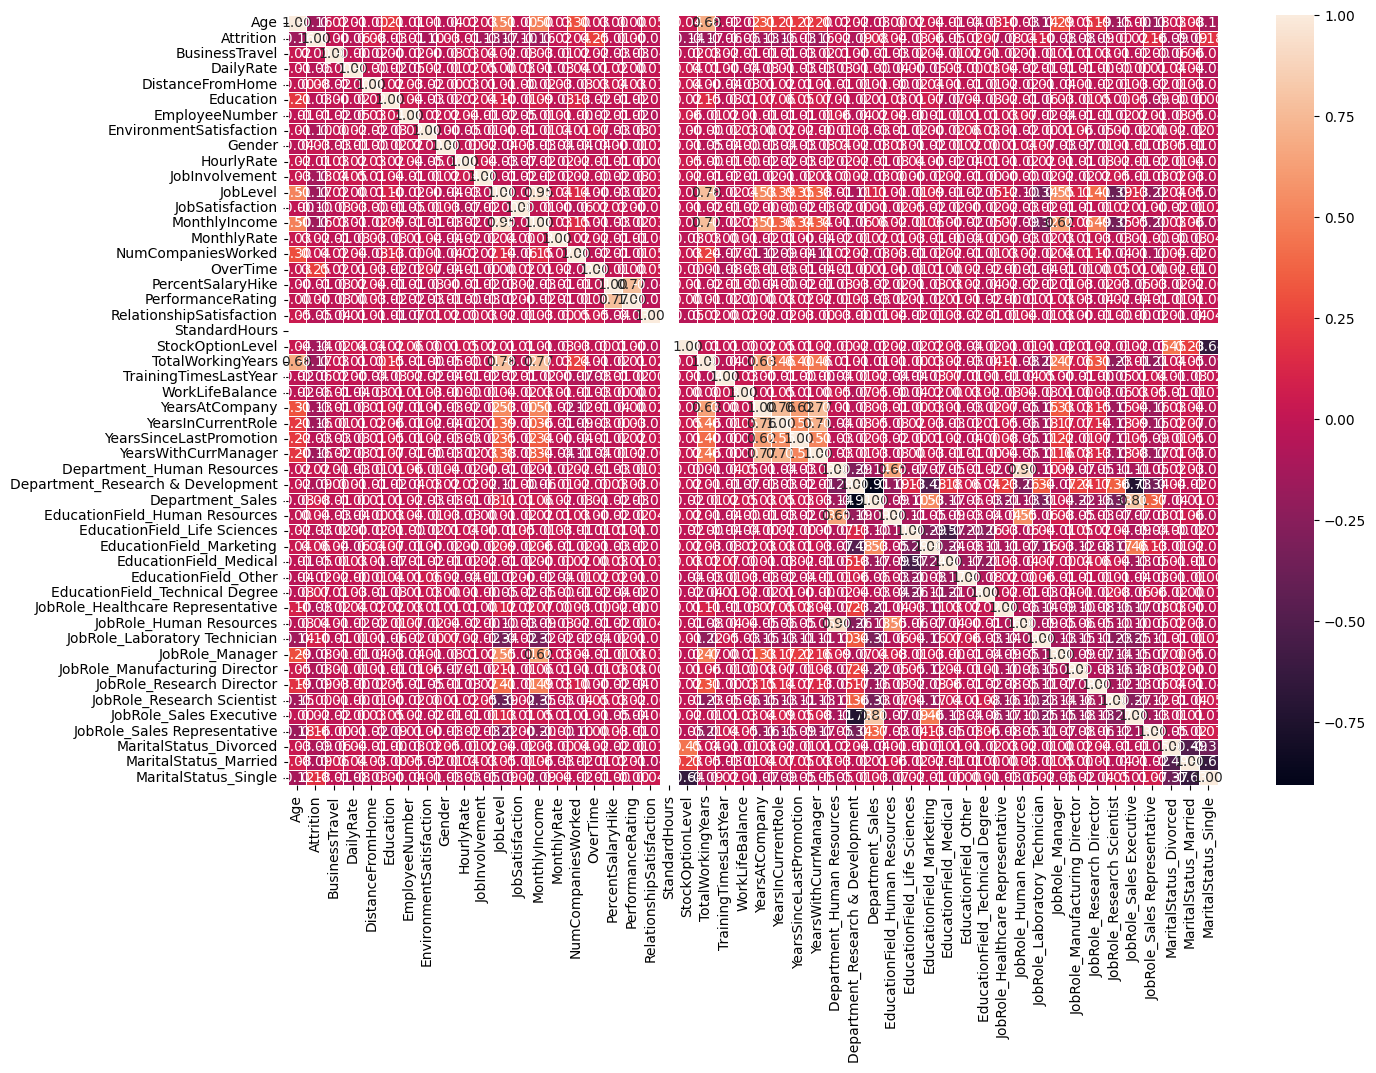

In [136]:
corr_matrix=df2.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

#### Saving the cleaned dataset into another CSV file



In [137]:
df2.to_csv("saved_table_of_Employee_Atrrition_Dataset_Preprocessing.csv")


#### Now, from the processed data we have to separate the features and target column again.



In [138]:
X = df2.drop('Attrition',axis=1)
y = df2['Attrition']

## Splitting data – Train test split


In [139]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
X_train.head()

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
1316,43,1,1422,2,4,1849,1,1,92,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
909,19,2,265,25,3,1269,2,0,57,4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1453,36,2,1120,11,4,2045,2,0,100,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1358,31,2,1079,10,2,1912,3,0,86,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
157,58,2,1145,9,3,214,2,0,75,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Modeling

<h5>We will use models to predict the Attrition of Employees
<ul>
    <li>KNeighborsClassifier</li>
    <li>SVC</li>
    <li>GaussianNB</li>
    <li>LogisticRegression</li>
    <li>DecisionTreeClassifier</li>
    <li>RandomForestClassifier</li>
    <li>AdaBoostClassifier</li>
</ul>


In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics


#### Function to plot Confusion Matrix


In [141]:
def cm_plot(cm,Model):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Comparison of Prediction Result for '+ Model)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

#### Function to Train and Test Machine Learning Model

In [188]:
def train_test_ml_model(X_train,y_train,X_test,Model):
    model.fit(X_train,y_train) #Train the Model
    y_pred = model.predict(X_test) #Use the Model for prediction
    y_train_pred = model.predict(X_train)
    train_accuracy = metrics.accuracy_score(y_train,y_train_pred)
    test_accuracy = metrics.accuracy_score(y_test,y_pred)
    #Plot/Display the results
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
    cm_display.plot()
    plt.show()
    
    # Test the Model
    # accuracy = round(100*np.trace(confusion_matrix)/np.sum(confusion_matrix),1)
    print('Train accuracy of the Model', Model, str(round(train_accuracy * 100)) + '%')
    print('Test accuracy of the Model', Model, str(round(test_accuracy * 100)) + '%')


<ul>
    <h4>1/-KNN</h4>
</ul>

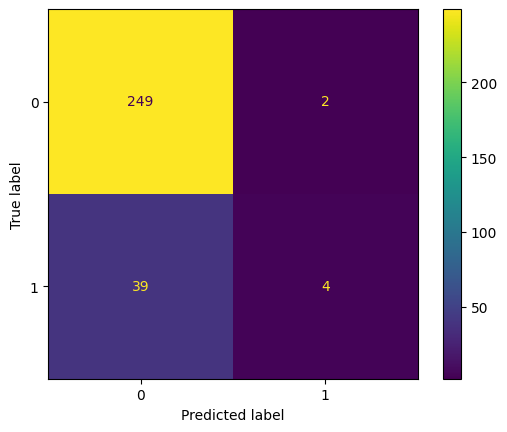

Train accuracy of the Model KNeighborsClassifier 84%
Test accuracy of the Model KNeighborsClassifier 86%


In [189]:
Model = "KNeighborsClassifier"
model=KNeighborsClassifier(n_neighbors=7) #Create the Model

train_test_ml_model(X_train,y_train,X_test,Model)

<ul>
    <h4>2/-SVC</h4>
</ul>

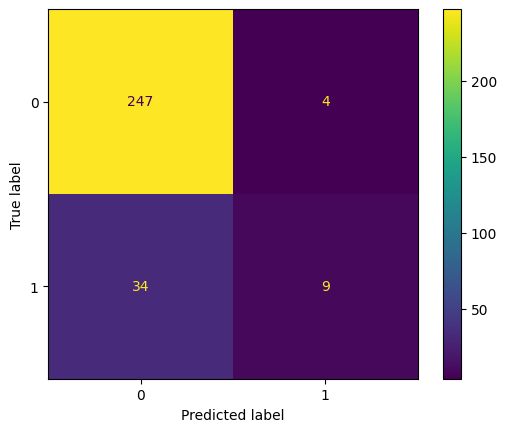

Train accuracy of the Model SVC 85%
Test accuracy of the Model SVC 87%


In [190]:
Model = "SVC"
model=SVC(kernel='linear') #Create the Model

train_test_ml_model(X_train,y_train,X_test,Model)

<ul>
    <h4>3/-GaussianNB</h4>
</ul>

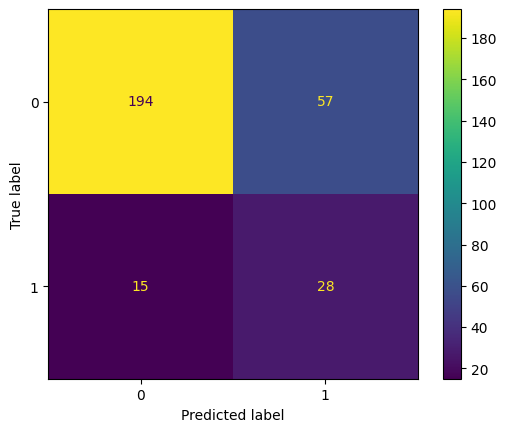

Train accuracy of the Model GaussianNB 75%
Test accuracy of the Model GaussianNB 76%


In [191]:
Model = "GaussianNB"
model=GaussianNB() #Create the Model

train_test_ml_model(X_train,y_train,X_test,Model)

<ul>
    <h4>4/-LogisticRegression</h4>
</ul>

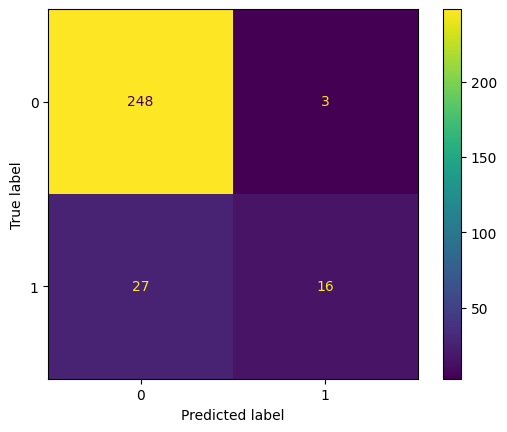

Train accuracy of the Model LogisticRegression 88%
Test accuracy of the Model LogisticRegression 90%


In [212]:
Model = "LogisticRegression"
model=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear') #Create the Model

train_test_ml_model(X_train,y_train,X_test,Model)

<ul>
    <h4>5/-DecisionTreeClassifier</h4>
</ul>

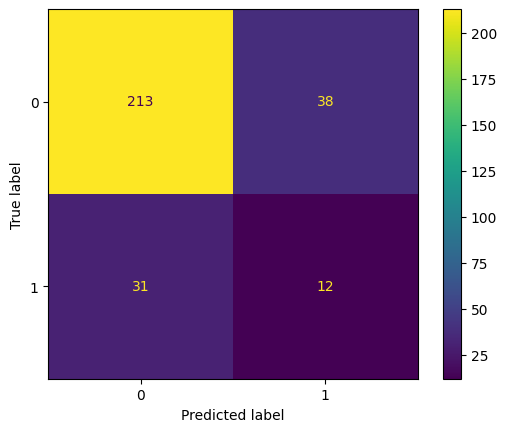

Train accuracy of the Model DecisionTreeClassifier 100%
Test accuracy of the Model DecisionTreeClassifier 77%


In [193]:
Model = "DecisionTreeClassifier"
model=DecisionTreeClassifier() #Create the Model

train_test_ml_model(X_train,y_train,X_test,Model)

<ul>
    <h4>6/-RandomForestClassifier</h4>
</ul>

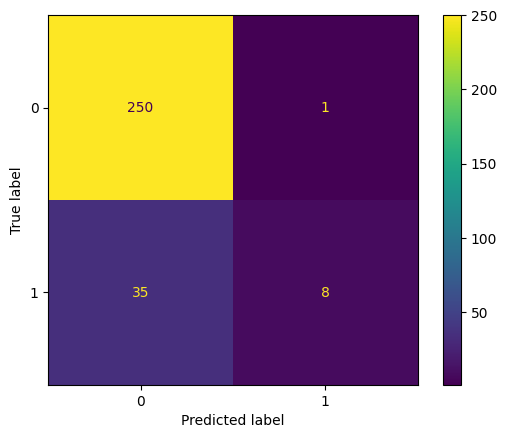

Train accuracy of the Model RandomForestClassifier 90%
Test accuracy of the Model RandomForestClassifier 88%


In [257]:
Model = "RandomForestClassifier"
model=RandomForestClassifier(n_estimators=100,criterion='entropy',min_samples_split=3,min_samples_leaf=2,max_depth=7) #Create the Model

train_test_ml_model(X_train,y_train,X_test,Model)

<ul>
    <h4>7/-AdaBoostClassifier</h4>
</ul>

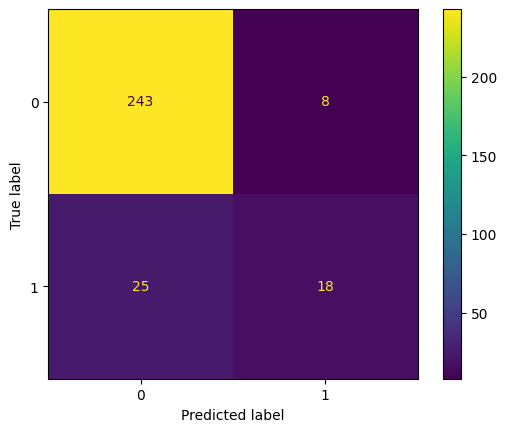

Train accuracy of the Model AdaBoostClassifier 91%
Test accuracy of the Model AdaBoostClassifier 89%


In [228]:
Model = "AdaBoostClassifier"
model=AdaBoostClassifier(learning_rate=1,n_estimators=60) #Create the Model

train_test_ml_model(X_train,y_train,X_test,Model)

# Models With GridSearch


#### For
<ul>
    <li>AdaBoostClassifier</li>
    <li>RandomForestClassifier</li>
    <li>LogisticRegression</li>
</ul>

##### RandomForestClassifier

In [258]:
from sklearn.model_selection import GridSearchCV

In [259]:
param_grid = {
    'n_estimators': [25,50,75,100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,20,25],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [10,15,20],
    'max_features': [None, 'sqrt', 'log2']
}

# Create a decision tree classifier
rdf_classifier = RandomForestClassifier()

# Perform Grid Search
grid_search = GridSearchCV(rdf_classifier, param_grid, cv=5,scoring='f1')
grid_search.fit(X_train, y_train)


In [ ]:

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model with the best parameters
print("Grid Search Best Score:", grid_search.best_score_)